In [1]:
# matplotlib 환경 설정
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = 'AppleGothic'
plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (14,4)
plt.rcParams['axes.grid'] = True 

In [2]:
#import os
import pandas as pd
import numpy as np

#path = os.path.realpath(os.path.abspath(__file__))
#curr_dir = os.path.dirname(path)

# data_17_4Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/17_4Q_종합순위_220605_162750.xlsx')
# data_18_4Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/18_4Q_종합순위_220605_162757.xlsx')
# data_19_4Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/19_4Q_종합순위_220605_163051.xlsx')
# data_20_4Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/20_4Q_종합순위_220605_162803.xlsx')
data_21_1Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/21_1Q_종합순위_220605_162809.xlsx')
# data_21_2Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/21_2Q_종합순위_220605_162821.xlsx')
data_21_3Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/21_3Q_종합순위_220605_162743.xlsx')
# data_21_4Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/21_4Q_종합순위_220605_162815.xlsx')
data_22_1Q = pd.read_excel('/Users/jkkim/workspace/python/stock/my/download/22_1Q_종합순위_220605_162827.xlsx')



In [3]:
from marcap import marcap_data

price = marcap_data('2021-01-01', '2022-06-05')

In [5]:

#filtered = price.loc[price['Code'].isin(code.to_list())]
total = None

# 1번째

#strategry =
start_date = '2021-04-01'
end_date = '2021-09-30'
how_many = 20
initial_money = 20000000

filtered = price['2021-04':'2021-09']

data = data_21_1Q
data['종목코드'] = data['종목코드'].apply(lambda x: '{:06d}'.format(x))
tailed = data.sort_values(by='시가총액', ascending=False).tail(int(len(data)*0.2))
sorted = tailed.sort_values(by='종합 순위', ascending=True)
head = sorted.head(how_many)
#code = head['종목코드']

portfolio = {}
stock_amount = 0

for i, row in head.iterrows():
    code = price.loc[price['Code'] == row['종목코드']]
    day = code.loc[start_date]
    close = day['Close']
    n = int(initial_money / how_many / close)
    portfolio[row['종목코드']] = n
    stock_amount += n * close

cash_amount = initial_money - stock_amount

series = 0
for i, row in head.iterrows():
    dataframe = filtered.loc[filtered['Code'] == row['종목코드']]
    series = series + dataframe['Close'] * portfolio[row['종목코드']]

#backtest = pd.DataFrame({'주식': series})
#backtest['현금'] = [cash_amount] * len(backtest)
#backtest['합계'] = backtest['주식'] + backtest['현금']
#backtest['일변화율'] = backtest['합계'].pct_change()
#backtest['총변화율'] = backtest['합계'] / initial_money - 1



In [6]:
# 각종목별 변화율 그려보기

backtest = pd.DataFrame()
series = 0
for i, row in head.iterrows():
    dataframe = filtered.loc[filtered['Code'] == row['종목코드']]
    series = dataframe['Close'] * portfolio[row['종목코드']]
    backtest[row['종목명']] = dataframe['Close'] * portfolio[row['종목코드']]
    


<AxesSubplot:xlabel='Date'>

<Figure size 1728x720 with 0 Axes>

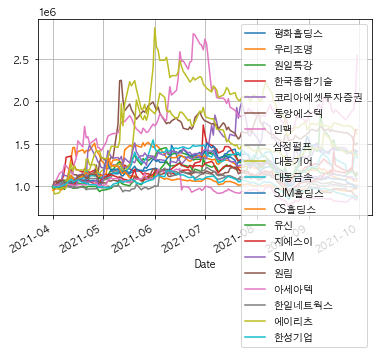

In [10]:
#plt.figure(figsize=(12, 6))
plt.figure(figsize=(12, 6))
backtest.plot()
#plt.show()